In [1]:
from fastai2.vision.all import * 

## DataBlocks

In [71]:
path = untar_data(URLs.MNIST_TINY)
path.ls()

(#5) [Path('/home/ubuntu/.fastai/data/mnist_tiny/valid'),Path('/home/ubuntu/.fastai/data/mnist_tiny/test'),Path('/home/ubuntu/.fastai/data/mnist_tiny/train'),Path('/home/ubuntu/.fastai/data/mnist_tiny/labels.csv'),Path('/home/ubuntu/.fastai/data/mnist_tiny/models')]

In [72]:
files = get_image_files(path)
files[:5]

(#5) [Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7565.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7445.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/9169.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7924.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7197.png')]

In [73]:
dblock = DataBlock(blocks = [ImageBlock, CategoryBlock],
                  get_items = get_image_files, 
                  get_y=parent_label, 
                  splitter=GrandparentSplitter())

TfmdLists setup pipelines, pipelines don't call setup themselves by default. 

And `Categorize` has `setups`

Each block returns an instance of TransformBlock

1. **type_tfms**: PILImage.create(ImageBlock); Categorize (CategoryBlock)
2. **item_tfms**:
3. **batch_tfms**: IntToFloatTensor(ImageBlock)

In [80]:
items  = get_image_files(path)
splits = RandomSplitter()(items)

In [83]:
dblock._combine_type_tfms()

(#2) [(#2) [<function noop at 0x7fa77d1dd488>,<bound method PILBase.create of <class 'fastai2.vision.core.PILImage'>>],(#2) [<function parent_label at 0x7fa7520d78c8>,Categorize: (object,object) -> encodes (object,object) -> decodes]]

In [87]:
dset = Datasets(files, tfms=[[PILImage.create], [parent_label, Categorize]], 
                splits=splits)

In [96]:
dblock.getters

[<function fastai2.imports.noop(x=None, *args, **kwargs)>,
 <function fastai2.data.transforms.parent_label(o, **kwargs)>]

In [100]:
TfmdDL.__mro__

(fastai2.data.core.TfmdDL,
 fastai2.data.load.DataLoader,
 fastcore.foundation.GetAttr,
 object)

In [97]:
dblock.type_tfms

(#2) [(#1) [<bound method PILBase.create of <class 'fastai2.vision.core.PILImage'>>],(#1) [Categorize: (object,object) -> encodes (object,object) -> decodes]]

In [94]:
dblock._combine_type_tfms()[0]

(#2) [<function noop at 0x7fa77d1dd488>,<bound method PILBase.create of <class 'fastai2.vision.core.PILImage'>>]

In [95]:
dblock._combine_type_tfms()[1]

(#2) [<function parent_label at 0x7fa7520d78c8>,Categorize: (object,object) -> encodes (object,object) -> decodes]

In [ ]:
DataBlock

In [88]:
dset[0]

(PILImage mode=RGB size=28x28, TensorCategory(1))

In [74]:
dls = dblock.dataloaders(path)

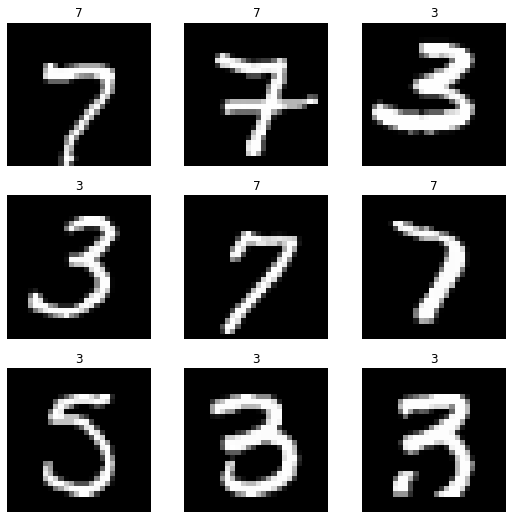

In [75]:
dls.show_batch()

### Categorize

In [27]:
items = ['a', 'b', 'c', 'c', 'b']
cat = Categorize()
cat.setups(items)

In [30]:
cat.vocab, cat.vocab.o2i

((#3) ['a','b','c'], {'a': 0, 'b': 1, 'c': 2})

### DataBlock `__init__`

In [33]:
callable(ImageBlock)

True

In [36]:
from fastai2.data.block import _merge_tfms

In [38]:
blocks = L(ImageBlock, CategoryBlock, ImageBlock)
blocks = L(b() for b in blocks)
blocks.attrgot('type_tfms')

(#3) [(#1) [<bound method PILBase.create of <class 'fastai2.vision.core.PILImage'>>],(#1) [Categorize: (object,object) -> encodes (object,object) -> decodes],(#1) [<bound method PILBase.create of <class 'fastai2.vision.core.PILImage'>>]]

In [55]:
def CustomBlock():
    return TransformBlock(type_tfms=PILImage.create, 
                          item_tfms=Resize((128,128)))

In [56]:
blocks = L(ImageBlock, CustomBlock, CategoryBlock)
blocks = L(b() for b in blocks)
blocks.attrgot('item_tfms')

(#3) [(#1) [<class 'fastai2.data.transforms.ToTensor'>],(#2) [<class 'fastai2.data.transforms.ToTensor'>,Resize: (TensorBBox,object) -> encodes
(TensorPoint,object) -> encodes
(Image,object) -> encodes ],(#1) [<class 'fastai2.data.transforms.ToTensor'>]]

In [57]:
_merge_tfms(*blocks.attrgot('item_tfms'))

(#2) [ToTensor: (PILMask,object) -> encodes
(PILBase,object) -> encodes ,Resize: (TensorBBox,object) -> encodes
(TensorPoint,object) -> encodes
(Image,object) -> encodes ]

In [ ]:
class PILImageNew(PILImage): pass

@Transform 
def some_transform(o: PILImageNew): pass 

In [ ]:
TfmdDL()

In [62]:
@delegates(TfmdDL.__init__)
class DL: 
    def __init__(self, **kwargs): pass

In [65]:
class SC:
    def __init__(self, **kwargs): pass
delegates(TfmdDL.__init__)(SC)

__main__.SC

## Create Custom Block

In [2]:
def get_items(o):
    return L([1,2,3,4,5])

In [3]:
class Custom(Transform):
    def encodes(self, o): return o+1 
    def decodes(self, o): return o-1

In [4]:
def CustomBlock():
    return TransformBlock(type_tfms=Custom())

In [5]:
dblock = DataBlock(blocks=(CustomBlock), 
                   get_items=get_items, 
#                    getters=[[custom_noop], [parent_label]],
                   get_x=custom_noop,
#                    get_y=parent_label, 
                   splitter=RandomSplitter())

NameError: name 'custom_noop' is not defined

In [ ]:
dls = dblock.dataloaders(path)

In [ ]:
dls.train.dataset.items, dls.train.dataset[:]

In [ ]:
dls.valid.dataset.items

## `DataLoader`

## Datasets

In [2]:
items = np.arange(1, 100)

In [3]:
# @Transform
def add_one(o:str): return o+1

# @Transform
def mul_two(o:str): return o*2

# @Transform
def div_two(o): return o/2

In [4]:
path = untar_data(URLs.MNIST_TINY)

In [5]:
!tree -d {path}

/home/ubuntu/.fastai/data/mnist_tiny
├── models
├── test
├── train
│   ├── 3
│   └── 7
└── valid
    ├── 3
    └── 7

8 directories


In [6]:
items = get_image_files(path/'train')

In [7]:
dset = Datasets(items, tfms=[ImageBlock().type_tfms[0], 
                             [parent_label, CategoryBlock().type_tfms[0]]])

In [8]:
dset[0]

(PILImage mode=RGB size=28x28, TensorCategory(1))

## TfmdLists

In [3]:
@Transform
def add_one(o:float): return o+1

@Transform
def mul_two(o): return o*2

In [4]:
items = np.arange(1,100)

In [5]:
splits=[np.arange(0,70), np.arange(70,90), np.arange(90,99)]

In [6]:
tfm_list = TfmdLists(items, tfms=[add_one, mul_two], splits=splits)

In [7]:
tfm_list.split_idx

In [8]:
tfm_list.tfms.fs

(#2) [add_one: (float,object) -> add_one ,mul_two: (object,object) -> mul_two ]

In [9]:
tfm_list.types

[float, numpy.int64, numpy.int64]

In [10]:
tfm_list.pretty_types

"  - <class 'float'>\n  - <class 'numpy.int64'>"

In [11]:
tfm_list.train.tfms[0].split_idx

In [161]:
tfm_list.train.split_idx

0

In [15]:
splits[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])

In [14]:
tfm_list.items

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [13]:
tfm_list.subset(0)

TfmdLists: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
tfms - (#2) [add_one: (float,object) -> add_one ,mul_two: (object,object) -> mul_two ]

In [16]:
tfm_list.train(tfm_list.train)

Pipeline: add_one -> mul_two

In [17]:
tfm_list.train(tfm_list.subset(0))

TfmdLists: [142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176
 178 180]
tfms - (#2) [add_one: (float,object) -> add_one ,mul_two: (object,object) -> mul_two ]

In [140]:
tfm_list.valid(tfm_list.valid)

TfmdLists: [142 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176
 178 180]
tfms - (#2) [add_one: (object,object) -> add_one ,mul_two: (object,object) -> mul_two ]

## Pipeline

In [43]:
def add_one(o:int)->int: return o+1
add_one.split_idx=0

In [44]:
def multiply_two(o): return o*2

In [45]:
tfms = [add_one, multiply_two]

In [46]:
pipe = Pipeline(funcs=tfms)

In [47]:
def divide_two(o): return o/2

In [48]:
pipe.add(divide_two)

In [49]:
pipe1 = Pipeline(funcs=[add_one, multiply_two])
pipe2 = Pipeline(funcs=[add_one, divide_two])

In [50]:
pipe1.add(pipe2)

In [53]:
pipe.fs

(#3) [add_one: (int,object) -> add_one ,multiply_two: (object,object) -> multiply_two ,divide_two: (object,object) -> divide_two ]

In [32]:
items[1], pipe1(items[1])

(2, 3.5)

In [54]:
type(add_one).__name__

'function'

In [22]:
@Transform
def add_one(o): return o+1

In [23]:
@Transform
def multiply_two(o): return o*2

In [128]:
pipe(items)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## Transform

In [86]:
@Transform 
def add_two(o): return o+2
add_two.split_idx=1

In [90]:
add_two(1, split_idx=0)

1

In [57]:
@Transform
def add_one(o:int): return o+1
@Transform
def add_one(o:str): return o+'YAY'

In [59]:
import albumentations
tfms1 = albumentations.RandomCrop(128, 128)

In [77]:
class CustomTypeTransform(Transform):
    def __init__(self):
        self.aug = compose(
            PILImage.create,
            albumentations.RandomCrop(128, 128), 
            albumentations.Rotate(5)
        )
    
    def encodes(self, o:Path): return self.aug(o)
    def encodes(self, o:int): return o+1
    def encodes(self,o:str): return o+'YAY'

In [78]:
# @Transform
# def encodes(o: PILImage): 
#     f = compose(
#             albumentations.RandomCrop(128, 128), 
#             albumentations.Rotate(5)
#         )
#     return f(o)

In [79]:
custom_tfm = CustomTypeTransform()

In [83]:
f = compose(
        albumentations.RandomCrop(128, 128), 
        albumentations.Rotate(5)
    )

In [88]:
# albumentations.Rotate(4)(Image.open(files[0]))

In [80]:
custom_tfm(files[0])

KeyError: 'image'

In [51]:
custom_tfm("I am getting this - ")

'I am getting this - YAY'

In [65]:
f = compose(
            PILImage.create,
            albumentations.RandomCrop(128, 128), 
            albumentations.Rotate(5)
        )
f(files[0])

KeyError: 'image'

In [64]:
custom_tfm(files[0])

KeyError: 'image'

In [56]:
files[0:2]

(#2) [Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7565.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7445.png')]

In [55]:
custom_tfm((1, "I am getting this - ", files[0:2]))

(2,
 'I am getting this - YAY',
 (#2) [Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7565.png'),Path('/home/ubuntu/.fastai/data/mnist_tiny/valid/7/7445.png')])